# IMPORT PACKAGES

In [1]:
from bisect import bisect_left
import sys
sys.path.append(r"C:\Users\jarra\Desktop\Masters\Heatwave_Project")
import pandas as pd
import PT13_Functions_For_Masters_New_Test as HW_Func
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import kendalltau


import scipy
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import warnings
warnings.filterwarnings("ignore")
#RMSE 
from sklearn.metrics import mean_squared_error
from math import sqrt
from datetime import datetime
import seaborn as sns
np.random.default_rng(seed=None)
import dask
import xarray as xr
import netCDF4 as nc
import os
import csv
import pandas as pd

# DOWNLOAD DATA



### 20CR TMAX FROM NCI

In [2]:
CR20_data = xr.open_mfdataset(r"E:\LIBRARY\UNIVERSITY\Masters Research\20CR\1840_Mean_Temp.nc",decode_times=True,engine='netcdf4')
#Get it to deg C
CR20_data['tmax'] = CR20_data['tmax']-273.15
CR20_data

#Extract the location of Perth
NCI_Tmax = CR20_data['tmax'].sel(lon = 115.98, lat =  -31.93, method= 'nearest')


### 20CR 2m Air Tempereture NOAA (Smaller file)


In [42]:
CR20_data = xr.open_mfdataset(r"E:\LIBRARY\UNIVERSITY\Masters Research\Python\Data\NAOO 20CR\air.2m.1840 (3).nc",decode_times=True,engine='netcdf4')
#Get it to deg C
CR20_data['air'] = CR20_data['air']-273.15


#Extract the location of Perth
NOAA_TMAX_AIR_2M_3= CR20_data['air'].sel(lon = 115.98, lat =  -31.93, method= 'nearest')


### 20CR 2m Air Tempereture 8XDay NOAA

In [36]:
CR20_data = xr.open_mfdataset(r"E:\LIBRARY\UNIVERSITY\Masters Research\Python\Data\NAOO 20CR\tmax.2m.8Xday.ltm.nc",decode_times=True,engine='netcdf4')
#Get it to deg C
CR20_data['tmax'] = CR20_data['tmax']-273.15
CR20_data

#Extract the location of Perth
NOAA_TMAX_AIR_2M_8x_Daily = CR20_data.sel(lon = 115.98, lat =  -31.93, method= 'nearest')
NOAA_TMAX_AIR_2M_8x_Daily


#Doesnt seem to work

<xarray.Dataset>
Dimensions:             (time: 2920, nbnds: 2)
Coordinates:
    lat                 float32 -32.0
    lon                 float32 116.0
  * time                (time) object 0001-01-01 00:00:00 ... 0001-12-31 21:0...
Dimensions without coordinates: nbnds
Data variables:
    climatology_bounds  (time, nbnds) datetime64[ns] dask.array<chunksize=(2920, 2), meta=np.ndarray>
    tmax                (time) float32 dask.array<chunksize=(2920,), meta=np.ndarray>
    valid_yr_count      (time) float32 dask.array<chunksize=(2920,), meta=np.ndarray>
Attributes: (12/25)
    Conventions:                    CF-1.2
    title:                          8x Daily NOAA/CIRES/DOE 20th Century Rean...
    comments:                       Data are from \nNOAA/CIRES/DOE 20th Centu...
    standard_name_vocabulary:       NetCDF Climate and Forecast (CF) Metadata...
    license:                        These data are available free of charge u...
    spatial_resolution:             1.0 degree
    ...                             ...
    citation1:                      Slivinski, L. C, G. P. Compo, J. S. Whita...
    References:                     https://www.psl.noaa.gov/data/gridded/dat...
    creator_name:                   NOAA/PSL
    institution:                    NOAA Physical Sciences Laboratory & CU/CI...
    contact:                        psl.data@noaa.gov
    citation:                       Compo,G.P. <https://www.psl.noaa.gov/peop...

### 20CR 2m Air Tempereture DAY ITM NOAA

In [38]:
CR20_data = xr.open_mfdataset(r"E:\LIBRARY\UNIVERSITY\Masters Research\Python\Data\NAOO 20CR\tmax.2m.day.ltm.nc",decode_times=True,engine='netcdf4')
#Get it to deg C
CR20_data['tmax'] = CR20_data['tmax']-273.15
CR20_data

#Extract the location of Perth
NOAA_TMAX_AIR_2M_Daily_ITM = CR20_data.sel(lon = 115.98, lat =  -31.93, method= 'nearest')
NOAA_TMAX_AIR_2M_Daily_ITM

#Doesnt seem to work

<xarray.Dataset>
Dimensions:             (time: 365, nbnds: 2)
Coordinates:
    lat                 float32 -32.0
    lon                 float32 116.0
  * time                (time) object 0001-01-01 00:00:00 ... 0001-12-31 00:0...
Dimensions without coordinates: nbnds
Data variables:
    climatology_bounds  (time, nbnds) datetime64[ns] dask.array<chunksize=(365, 2), meta=np.ndarray>
    tmax                (time) float32 dask.array<chunksize=(365,), meta=np.ndarray>
    valid_yr_count      (time) float32 dask.array<chunksize=(365,), meta=np.ndarray>
Attributes: (12/25)
    Conventions:                    CF-1.2
    title:                          Daily NOAA/CIRES/DOE 20th Century Reanaly...
    comments:                       Data are from \nNOAA/CIRES/DOE 20th Centu...
    standard_name_vocabulary:       NetCDF Climate and Forecast (CF) Metadata...
    license:                        These data are available free of charge u...
    creator_name:                   NOAA/PSL
    ...                             ...
    assimilation_algorithm:         Ensemble Kalman Filter with 4DIAU
    References:                     https://www.psl.noaa.gov/data/gridded/dat...
    dataset_title:                  NOAA/CIRES/DOE 20th Century Reanalysis (V3)
    forcing_note:                   Additional information on the external fo...
    citation:                       Compo,G.P. <https://www.psl.noaa.gov/peop...
    not_missing_threshold_percent:  minimum 3% values input to have non-missi...

### 20CR 2m Air Tempereture NOAA (larger file)

In [44]:
CR20_data = xr.open_mfdataset(r"E:\LIBRARY\UNIVERSITY\Masters Research\Python\Data\NAOO 20CR\air.2m.1840 (4).nc",decode_times=True,engine='netcdf4')
#Get it to deg C
CR20_data['air'] = CR20_data['air']


#Extract the location of Perth
NOAA_TMAX_AIR_2M_4= CR20_data['air'].sel(lon = 115.98, lat =  -31.93, method= 'nearest')

# Plot them


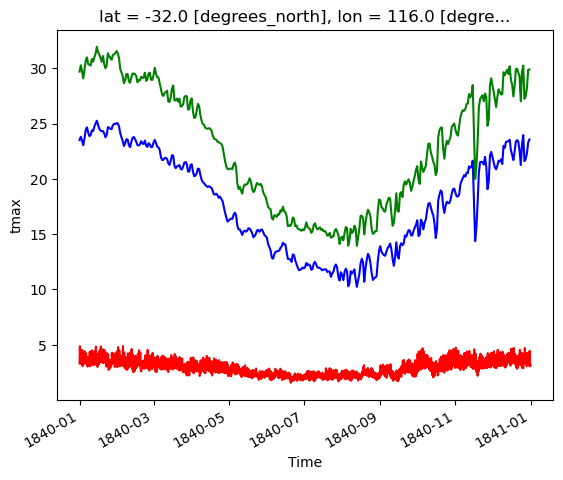

In [46]:
NOAA_TMAX_AIR_2M_4.plot(color = 'red')
NOAA_TMAX_AIR_2M_3.plot(color = 'blue')
NCI_Tmax.plot(color = 'green')


From what I see here is that all values of the NCI Tmax are warmer then the NOAA 20CR we have, therefore we suspect that the NCI version is the one that at least is the max however, there are slightly different flucuations in the NCI product compared to the NOAA product. What is also interesting is that for tge most part the 80- models tend to converge more in hte winter months of 1840 compared to the summer Months for this location. It will be interesting to see if a heatwave event allows the models to agree more, so this NOAA_TMAX_AIR_2M_4 would be a good estimation to what the 20CR model is doing across the board in terms of consistancy during a heatwave evnet when we do look at it.

But for now we can use the NCI 20CR as it should account for the maximum temperature compared to the NCI version. But will need to run this by Andrew first.

In [4]:
#Offset
CR20_data_offset()

NameError: name 'CR20_data_offset' is not defined

In [6]:
CR20_data.values


<bound method Mapping.values of <xarray.Dataset>
Dimensions:    (lat: 181, lon: 360, time: 366, nbnds: 2)
Coordinates:
  * lat        (lat) float32 -90.0 -89.0 -88.0 -87.0 ... 87.0 88.0 89.0 90.0
  * lon        (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * time       (time) datetime64[ns] 1840-01-01 1840-01-02 ... 1840-12-31
Dimensions without coordinates: nbnds
Data variables:
    tmax       (time, lat, lon) float32 dask.array<chunksize=(366, 181, 360), meta=np.ndarray>
    time_bnds  (time, nbnds) float64 dask.array<chunksize=(366, 2), meta=np.ndarray>
Attributes: (12/24)
    Conventions:               CF-1.2
    title:                     Daily NOAA/CIRES/DOE 20th Century Reanalysis V3
    comments:                  Data are from \nNOAA/CIRES/DOE 20th Century Re...
    standard_name_vocabulary:  NetCDF Climate and Forecast (CF) Metadata Conv...
    license:                   These data are available free of charge under ...
    spatial_resolution:        1.0 degr